## PCA for Image Compression

The goal of this exercise is to use PCA for image compression in Python.

##### a) Load an image of the famous painting "The Starry Night" by Vincent Van Gogh, and store it as an RGB-image.

In [3]:
# For easy image loading, we use skimage.io via io.imread(url)
# You can get it via installing the scikit-image module/package
# e.g. by executing this command from a cell -->   %pip install scikit-image

import numpy as np
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [60]:
# load the image
# url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg/895px-Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1364px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
img = io.imread(url)

# save it locally
io.imsave("images/original.png", img)

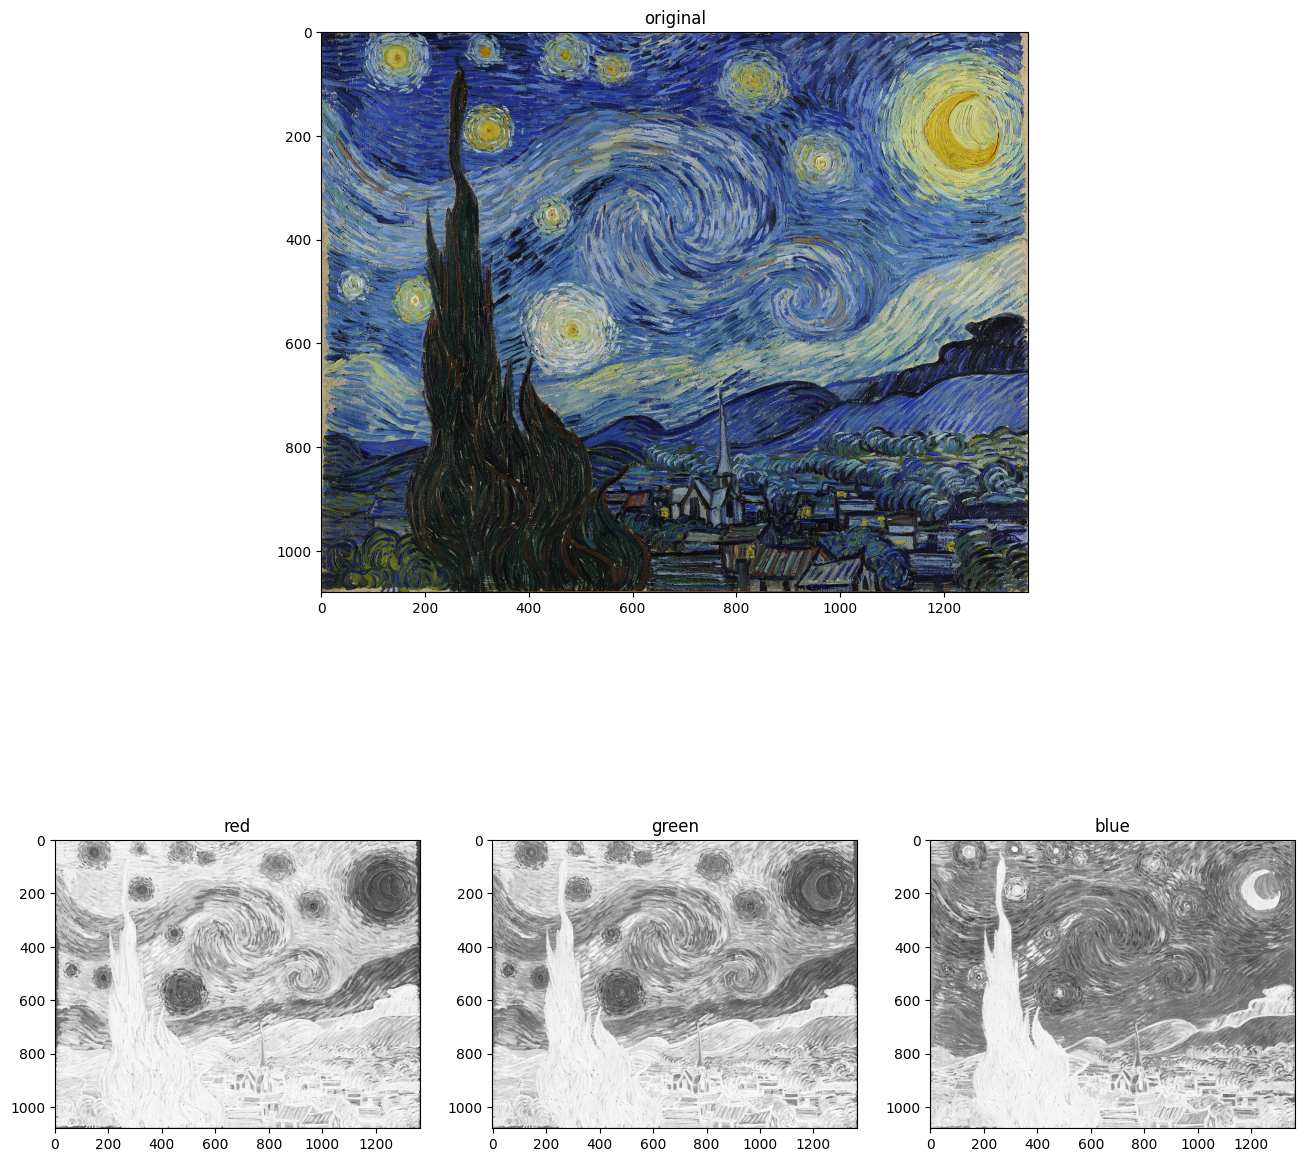

In [50]:
# have a look at the original image and the single channels

# prepare pyplot figure
fig = plt.figure(figsize=(16, 16))

# draw original image
fig.add_subplot(2, 1, 1)
plt.title("original")
plt.imshow(img)

# draw reds
fig.add_subplot(2, 3, 4)
plt.title("red")
plt.imshow(r, cmap="Greys")

# draw greens
fig.add_subplot(2, 3, 5)
plt.title("green")
plt.imshow(g, cmap="Greys")

# draw blues
fig.add_subplot(2, 3, 6)
plt.title("blue")
plt.imshow(b, cmap="Greys")

plt.show()

##### b) Apply PCA to compress the image.

In [51]:
# TODO:
# Write a custom function to reuse for subsequent tasks. Ideally, let it return
#  the PCA objects if needed (for subtask d) )

def compress_image(image, number_of_components=None, keep_pca_objects=False):
    """
    Uses PCA to compress a multi-channel image.

    Parameters
    ----------
    image : numpy.ndarray
    The image to compress
    number_of_components : int, optional
    The number of principal components to use for compression. If None, keeps all
    keep_pca_objects : bool, optional
    If True, a list of PCA objects will be returned alongside the compressed
    image. The default is False.

    Returns
    -------
    compressed_image : numpy.ndarray
    pca_objects : list, optional (see argument keep_pca_objects)
    """
    list_of_compressed_channels = list()
    list_of_pca_objects = list()

    # for each channel of the image
    for i in range(image.shape[2]):

        # TODO:
        # get channel image, normalize data to [0, 1] before applying PCA
        channel_data = img [: , : , i] / 255.0

        # TODO: apply pca (create PCA object, fit data, transform image channel
        #  (projects data onto principal components), inverse transform (reconstructs
        #  projected data from principal components coordinates back to original, but
        #  has reduced dimensionality now)
        pca = PCA (n_components=number_of_components)
        pca.fit(channel_data)
        compressed_channel_data = pca.inverse_transform(pca.transform(channel_data))

        # save fitted pca object
        if keep_pca_objects:
            list_of_pca_objects.append(pca)

        # save compressed channel
        list_of_compressed_channels.append(compressed_channel_data)

    # combine compressed channels into one compressed multi-channel image
    compressed_image = np.stack(list_of_compressed_channels, axis=2)

    # after PCA, the values may fall out of range [0, 255], and need to be
    #  renormalized accordingly (alternative: clipping)
    compressed_image = (compressed_image - np.min(compressed_image))
    compressed_image = (compressed_image * 255 / np.max(compressed_image))  \
                     .astype(np.uint8)

    returns = None
    if keep_pca_objects:
        returns = compressed_image, list_of_pca_objects
    else:
        returns = compressed_image
    return returns

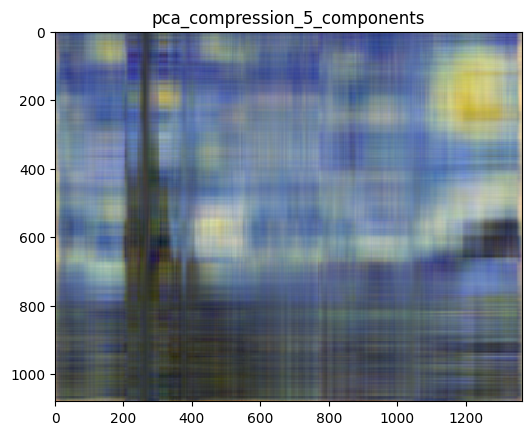

In [52]:
# use the custom function to compress the original image using 5 principal components
cimg = compress_image(img, 5)
plt.title("pca_compression_5_components")
plt.imshow(cimg);

##### c) Apply PCA for $n\in\{1, 2, 5, 10, 20\}$. If your computer if powerful enough, you can increase even further. Plot and save the compressed image in each iteration. Observe the size of the image files. Looking at the images, at what point do you clearly identify the painting?

CPU times: user 5min 25s, sys: 1min 28s, total: 6min 53s
Wall time: 58.2 s


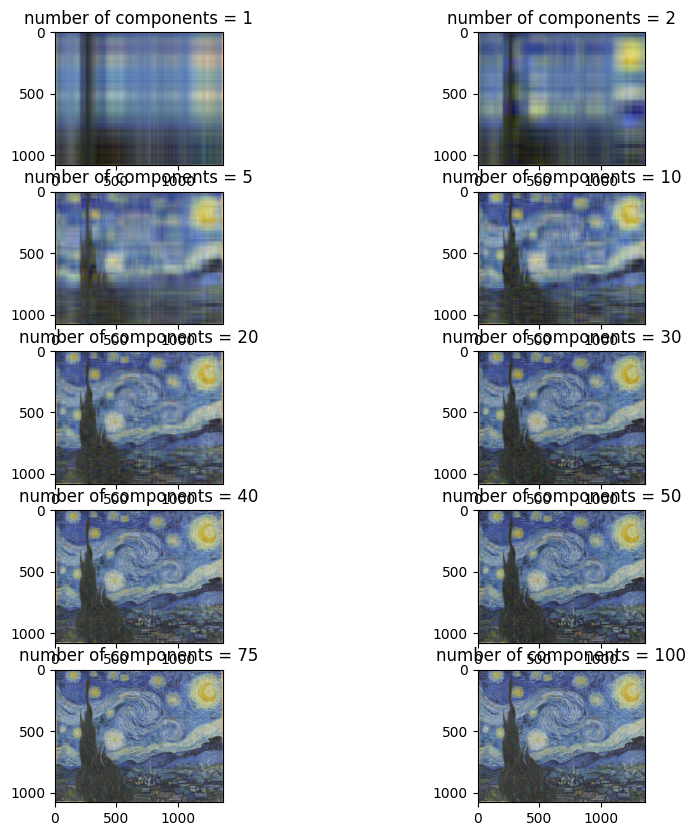

In [102]:
%%time
import math

ns = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100]

# prepare pyplot figure
fig = plt.figure(figsize=(10, 10))

for i, n in enumerate(ns, 1):
    cimg = compress_image(img, number_of_components=n)
    fig.add_subplot(math.ceil(len(ns) / 2), 2, i)
    io.imsave(f"images/pca_n_{n}.png", cimg)    
    plt.title(f"number of components = {n}")
    plt.imshow(cimg)

##### d) Determine a reasonable number of clusters using the "elbow criterion". For this purpose, create a scree plot that plots the explained variance of each component against the number of components, e.g. for $n\in[1, ..., 10]$. Does the "elbow point" correspond to your visual impression in c) ?

In [114]:
# TODO: for n in [1, ..., 10], plot the corresponding explained_variance_ratio_ of the PCA
#  (use the keep_pca_objects=True functionality of the compress_image function)
n = 10
x = np.linspace(1, n, n)
y = []

for i in range(1, n+1):
    cimg, pc = compress_image(img, i, keep_pca_objects=True)
    y.append(pc[0].explained_variance_ratio_)

plt.plot(x, y, color="black")

# Elbow criterion yields k=2 or k=3 (ambiguous).

[11.36244166] [0.31363994] [0.43407286]


AttributeError: 'list' object has no attribute 'inertia_'